In [1]:
#Importing required libraries for further analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
%matplotlib inline
sns.set()

In [2]:
#Loading data from .csv file into pandas DataFrame

data = pd.read_csv('C:/Users/tfmer/RetailSales/UK-Bank-Customers.csv')

In [3]:
#Viewing the Data

data.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [4]:
#Information about the Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
Customer ID           4014 non-null int64
Name                  4014 non-null object
Surname               4014 non-null object
Gender                4014 non-null object
Age                   4014 non-null int64
Region                4014 non-null object
Job Classification    4014 non-null object
Date Joined           4014 non-null object
Balance               4014 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 282.4+ KB


In [5]:
#Basic Descriptive Statistics

data.describe()

,Customer ID,Age,Balance
count,4.014000e+03,4014.000000,4014.000000
mean,1.696831e+08,38.611111,39766.448274
std,8.865374e+07,9.819121,29859.489192
min,1.000000e+08,15.000000,11.520000
25%,1.000020e+08,31.000000,16115.367500
50%,1.000038e+08,37.000000,33567.330000
75%,2.000031e+08,45.000000,57533.930000
max,4.000038e+08,64.000000,183467.700000


In [6]:
#Regions info for further analysis

data.Region.unique()

array(['England', 'Northern Ireland', 'Wales', 'Scotland'], dtype=object)

## Customer Baseline

In [7]:
#Aggregating genders for pie chart

Gender_Count = data['Gender'].value_counts()
Gender_Count

Male      2165
Female    1849
Name: Gender, dtype: int64

In [8]:
#Grouping job classifications for treemap

Job_Count = data.groupby('Job Classification').size().reset_index(name = 'Counts')
Job_Count_D = Job_Count.sort_values(by = 'Counts', ascending = False)
Job_Count_D

,Job Classification,Counts
2,White Collar,1955
0,Blue Collar,1049
1,Other,1010


In [9]:
#Getting % of total for Treemap labels

Job_Count_D['Percentage'] = (Job_Count_D['Counts']/Job_Count_D['Counts'].sum()) * 100
Job_Count_Percent = round(Job_Count_D['Percentage'], 1)
Job_Count_Percent

2    48.7
0    26.1
1    25.2
Name: Percentage, dtype: float64

In [10]:
#Setting bins for Age Distribution Histogram

age_bins = [0,10,20,30,40,50,60]

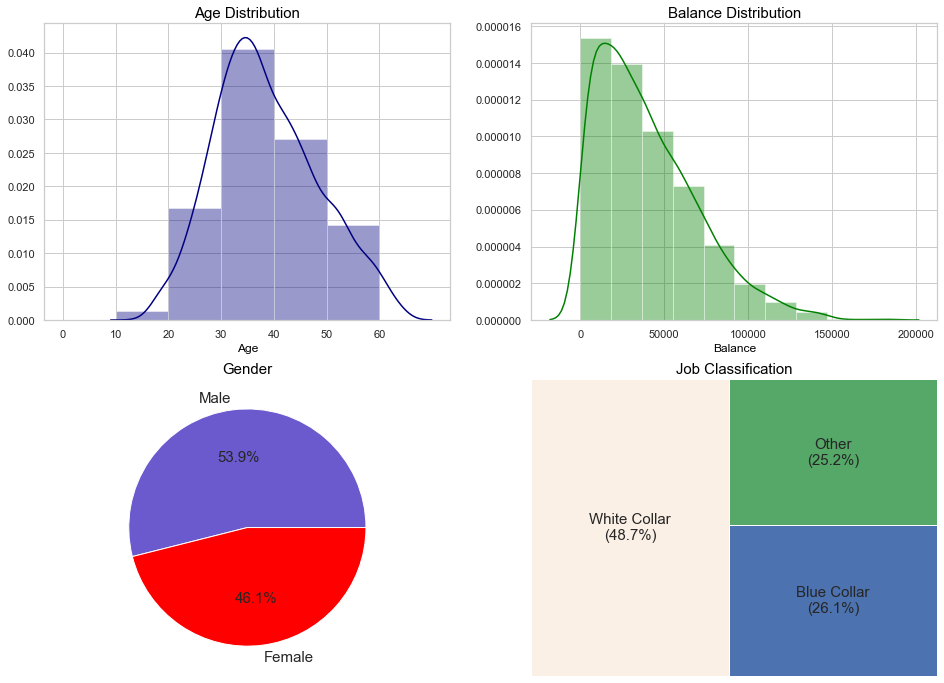

In [11]:
sns.set_style('whitegrid')

f, ax = plt.subplots(2,2, figsize = (16,12))

ax1 = sns.distplot(data.Age, bins = age_bins, color = 'navy', ax = ax[0,0]) #Age Distribution
ax[0,0].set_title('Age Distribution', fontsize = 15, Color = 'Black')
ax[0,0].set_xlabel('Age', fontsize = 12, color = 'Black')
ax[0,0].set_xticks(age_bins)


ax2 = sns.distplot(data.Balance, bins = 10, color = 'green', ax = ax[0,1]) #Balance Distribution
ax[0,1].set_title('Balance Distribution', fontsize = 15, color = 'Black')
ax[0,1].set_xlabel('Balance', fontsize = 12, color = 'Black')


ax3 = ax[1,0].pie(Gender_Count, labels = Gender_Count.index, autopct='%.1f%%', textprops={'fontsize': 15}, 
                  colors = ['slateblue', 'red']) #Gender Distribution
ax[1,0].set_title('Gender', fontsize = 15, Color = 'Black')

ax4 = squarify.plot(sizes = Job_Count_D['Counts'], color = ['linen','b','g'], 
                    label = Job_Count_D['Job Classification'] + '\n' + '(' + Job_Count_Percent.astype('str') + '%)',
                    text_kwargs={'fontsize':15}, ax = ax[1,1]) #Job Classification Treemap
ax[1,1].set_title('Job Classification', fontsize = 15, Color = 'Black')
plt.axis('off');

## 1. England Customers

In [12]:
ENG_Age = data[data.Region == 'England']['Age'] #Age of English customers
ENG_Balance = data[data.Region == 'England']['Balance'] #Balance of English customers
ENG_Gender = data[data.Region == 'England']['Gender'].value_counts() #Sum of Genders in England
ENG_Jobs = data[data.Region == 'England'].groupby('Job Classification').size().reset_index(name = 'Counts')
#Job Classifications in England
ENG_Gender

Female    1091
Male      1068
Name: Gender, dtype: int64

In [13]:
ENG_Jobs_D = ENG_Jobs.sort_values(by = 'Counts', ascending = False)
ENG_Jobs_D

,Job Classification,Counts
2,White Collar,1501
0,Blue Collar,344
1,Other,314


In [14]:
ENG_Jobs_D['Percentage'] = (ENG_Jobs_D['Counts']/ENG_Jobs_D['Counts'].sum()) * 100
ENG_Jobs_Percent = round(ENG_Jobs_D['Percentage'], 1)
ENG_Jobs_Percent

2    69.5
0    15.9
1    14.5
Name: Percentage, dtype: float64

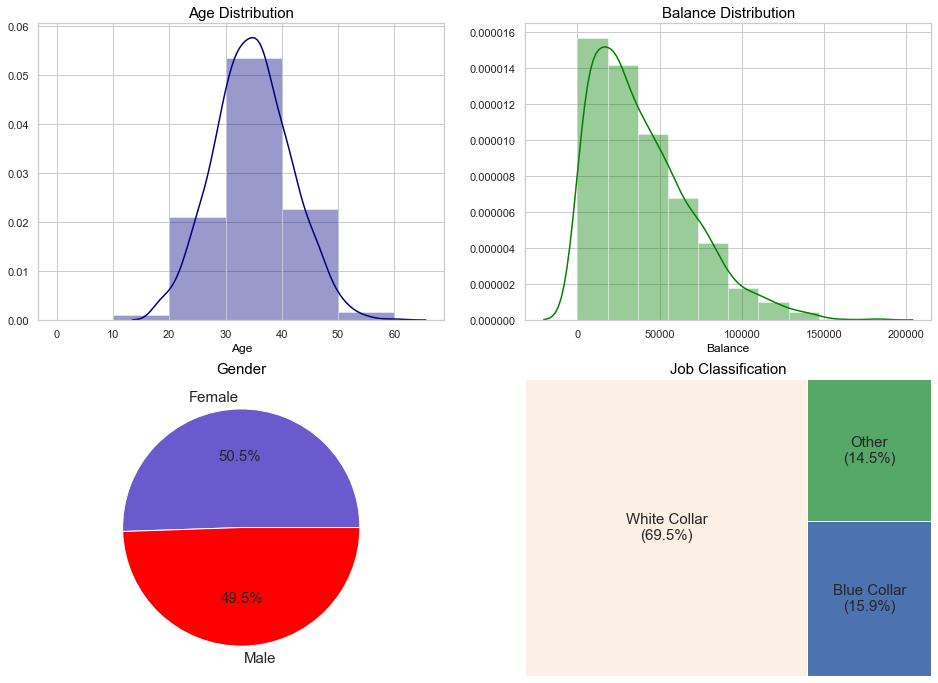

In [15]:
f, ax = plt.subplots(2,2, figsize = (16,12))

ax1 = sns.distplot(ENG_Age, bins = age_bins, color = 'navy', ax = ax[0,0]) #Age Distribution
ax[0,0].set_title('Age Distribution', fontsize = 15, Color = 'Black')
ax[0,0].set_xlabel('Age', fontsize = 12, color = 'Black')
ax[0,0].set_xticks(age_bins)

ax2 = sns.distplot(ENG_Balance, bins = 10, color = 'green', ax = ax[0,1]) #Balance Distribution
ax[0,1].set_title('Balance Distribution', fontsize = 15, color = 'Black')
ax[0,1].set_xlabel('Balance', fontsize = 12, color = 'Black')

ax3 = ax[1,0].pie(ENG_Gender, labels = ENG_Gender.index, autopct='%.1f%%', textprops={'fontsize': 15}, 
                  colors = ['slateblue', 'red']) #Gender Distribution
ax[1,0].set_title('Gender', fontsize = 15, Color = 'Black')

ax4 = squarify.plot(sizes = ENG_Jobs_D['Counts'], color = ['linen','b','g'], 
                    label = ENG_Jobs_D['Job Classification'] + '\n' + '(' + ENG_Jobs_Percent.astype('str') + '%)',
                    text_kwargs={'fontsize':15}, ax = ax[1,1]) #Job Classification Treemap
ax[1,1].set_title('Job Classification', fontsize = 15, Color = 'Black')
plt.axis('off');

### Most of the customers in England are White Collar workers in their mid 30s. Most likely, these client are professionals, who work in a corporate sector in London, one of the most important global cities.

## 2. Scotland Customers

In [16]:
SCT_Age = data[data.Region == 'Scotland']['Age'] #Age of Scottish customers
SCT_Balance = data[data.Region == 'Scotland']['Balance'] #Balance of Scottish customers
SCT_Gender = data[data.Region == 'Scotland']['Gender'].value_counts() #Sum of Genders in Scotland
SCT_Jobs = data[data.Region == 'Scotland'].groupby('Job Classification').size().reset_index(name = 'Counts')
#Job Classification in Scotland

In [17]:
SCT_Jobs_D = SCT_Jobs.sort_values(by = 'Counts', ascending = False)
SCT_Jobs_D

,Job Classification,Counts
0,Blue Collar,544
1,Other,496
2,White Collar,84


In [18]:
SCT_Jobs_D['Percentage'] = (SCT_Jobs_D['Counts']/SCT_Jobs_D['Counts'].sum()) * 100
SCT_Jobs_Percent = round(SCT_Jobs_D['Percentage'], 1)
SCT_Jobs_Percent

0    48.4
1    44.1
2     7.5
Name: Percentage, dtype: float64

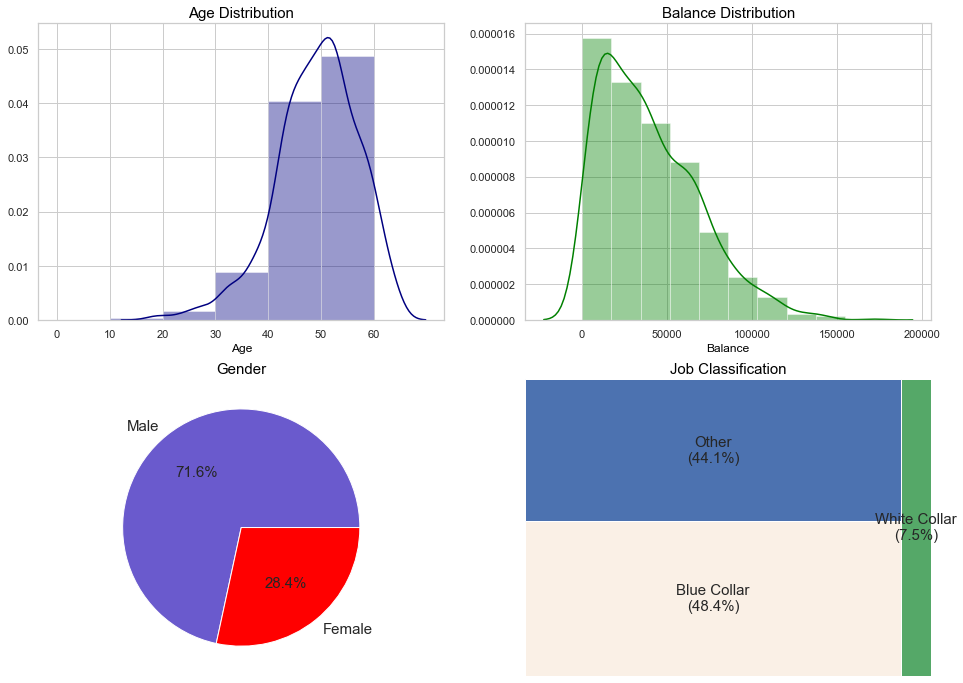

In [19]:
f, ax = plt.subplots(2,2, figsize = (16,12))

ax1 = sns.distplot(SCT_Age, bins = age_bins, color = 'navy', ax = ax[0,0]) #Age Distribution
ax[0,0].set_title('Age Distribution', fontsize = 15, Color = 'Black')
ax[0,0].set_xlabel('Age', fontsize = 12, color = 'Black')
ax[0,0].set_xticks(age_bins)

ax2 = sns.distplot(SCT_Balance, bins = 10, color = 'green', ax = ax[0,1]) #Balance Distribution
ax[0,1].set_title('Balance Distribution', fontsize = 15, color = 'Black')
ax[0,1].set_xlabel('Balance', fontsize = 12, color = 'Black')

ax3 = ax[1,0].pie(SCT_Gender, labels = SCT_Gender.index, autopct='%.1f%%', textprops={'fontsize': 15}, 
                  colors = ['slateblue', 'red']) #Gender Distribution
ax[1,0].set_title('Gender', fontsize = 15, Color = 'Black')

ax4 = squarify.plot(sizes = SCT_Jobs_D['Counts'], color = ['linen','b','g'], 
                    label = SCT_Jobs_D['Job Classification'] + '\n' + '(' + SCT_Jobs_Percent.astype('str') + '%)',
                    text_kwargs={'fontsize':15}, ax = ax[1,1]) #Job Classification Treemap
ax[1,1].set_title('Job Classification', fontsize = 15, Color = 'Black')
plt.axis('off');

### Most of the Scottish customers are Blue Collar Males. There is a high concentration of clients in their 40s and 50s.

## 3. Wales Customers

In [20]:
WAL_Age = data[data.Region == 'Wales']['Age'] #Age of Welsh customers
WAL_Balance = data[data.Region == 'Wales']['Balance'] #Balance of Welsh customers
WAL_Gender = data[data.Region == 'Wales']['Gender'].value_counts() #Sum of Genders in Wales
WAL_Jobs = data[data.Region == 'Wales'].groupby('Job Classification').size().reset_index(name = 'Counts')
#Job Classification in Wales

In [21]:
WAL_Jobs_D = WAL_Jobs.sort_values(by = 'Counts', ascending = False)
WAL_Jobs_D

,Job Classification,Counts
2,White Collar,305
0,Blue Collar,120
1,Other,95


In [22]:
WAL_Jobs_D['Percentage'] = (WAL_Jobs_D['Counts']/WAL_Jobs_D['Counts'].sum()) * 100
WAL_Jobs_Percent = round(WAL_Jobs_D['Percentage'], 1)
WAL_Jobs_Percent

2    58.7
0    23.1
1    18.3
Name: Percentage, dtype: float64

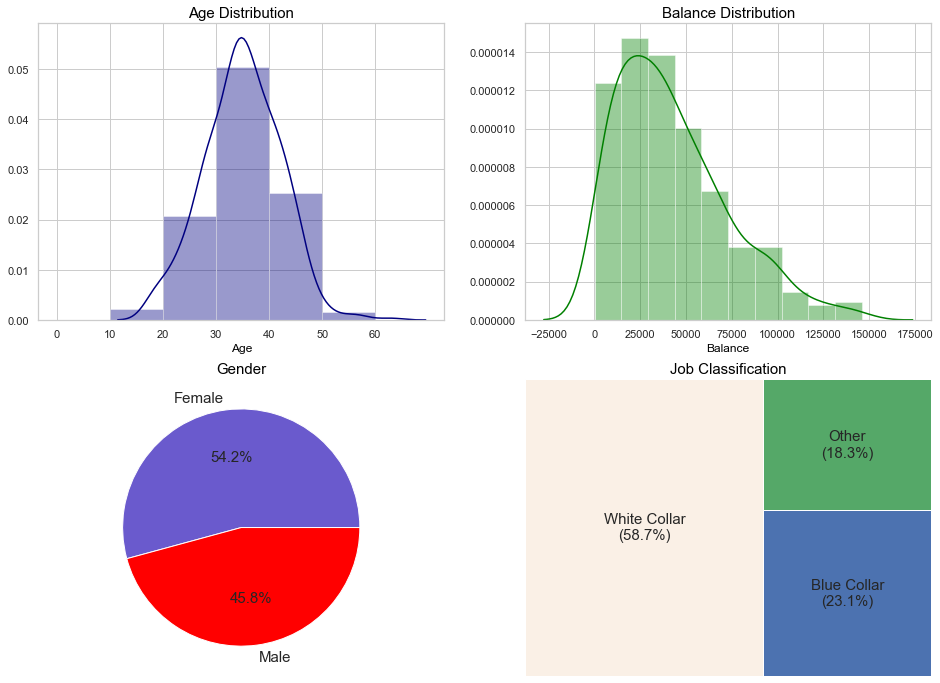

In [23]:
f, ax = plt.subplots(2,2, figsize = (16,12))

ax1 = sns.distplot(WAL_Age, bins = age_bins, color = 'navy', ax = ax[0,0]) #Age Distribution
ax[0,0].set_title('Age Distribution', fontsize = 15, Color = 'Black')
ax[0,0].set_xlabel('Age', fontsize = 12, color = 'Black')
ax[0,0].set_xticks(age_bins)

ax2 = sns.distplot(WAL_Balance, bins = 10, color = 'green', ax = ax[0,1]) #Balance Distribution
ax[0,1].set_title('Balance Distribution', fontsize = 15, color = 'Black')
ax[0,1].set_xlabel('Balance', fontsize = 12, color = 'Black')

ax3 = ax[1,0].pie(WAL_Gender, labels = WAL_Gender.index, autopct='%.1f%%', textprops={'fontsize': 15}, 
                  colors = ['slateblue', 'red']) #Gender Distribution
ax[1,0].set_title('Gender', fontsize = 15, Color = 'Black')

ax4 = squarify.plot(sizes = WAL_Jobs_D['Counts'], color = ['linen','b','g'], 
                    label = WAL_Jobs_D['Job Classification'] + '\n' + '(' + WAL_Jobs_Percent.astype('str') + '%)',
                    text_kwargs={'fontsize':15}, ax = ax[1,1]) #Job Classification Treemap
ax[1,1].set_title('Job Classification', fontsize = 15, Color = 'Black')
plt.axis('off');

### Most of the Welsh customers are in their mid 30s. Welsh clients have higher number of mid-size balances.

## 4. Northern Ireland Customers

In [24]:
NIR_Age = data[data.Region == 'Northern Ireland']['Age'] #Age of Northern Irish customers
NIR_Balance = data[data.Region == 'Northern Ireland']['Balance'] #Balance of Northern Irish customers
NIR_Gender = data[data.Region == 'Northern Ireland']['Gender'].value_counts() #Sum of Genders in Northern Ireland
NIR_Jobs = data[data.Region == 'Northern Ireland'].groupby('Job Classification').size().reset_index(name = 'Counts')
#Job Classification in Northern Ireland

In [25]:
NIR_Jobs_D = NIR_Jobs.sort_values(by = 'Counts', ascending = False)
NIR_Jobs_D

,Job Classification,Counts
1,Other,105
2,White Collar,65
0,Blue Collar,41


In [26]:
NIR_Jobs_D['Percentage'] = (NIR_Jobs_D['Counts']/NIR_Jobs_D['Counts'].sum()) * 100
NIR_Jobs_Percent = round(NIR_Jobs_D['Percentage'], 1)
NIR_Jobs_Percent

1    49.8
2    30.8
0    19.4
Name: Percentage, dtype: float64

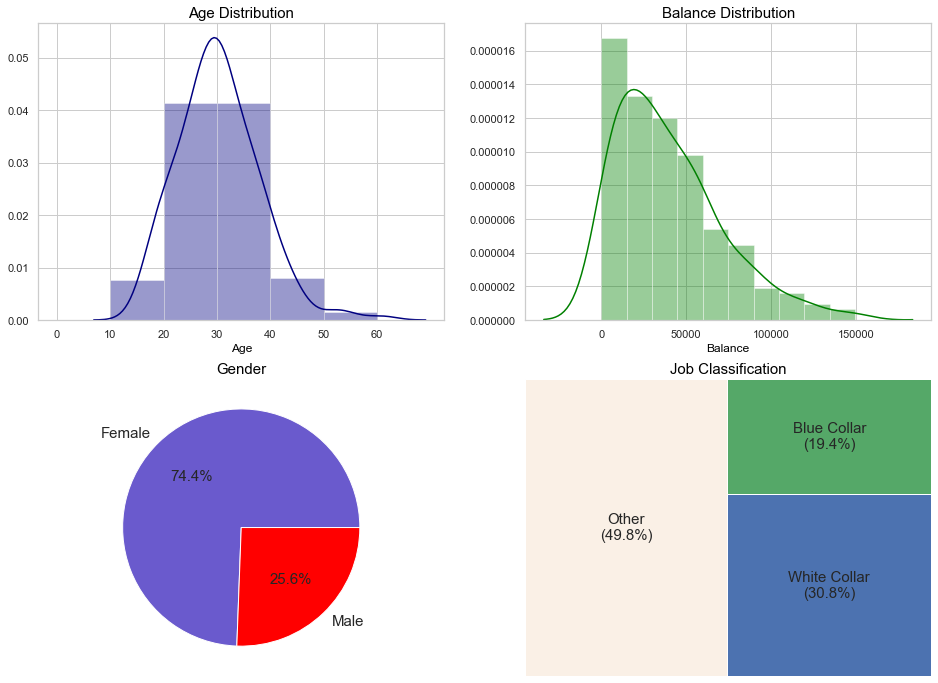

In [27]:
f, ax = plt.subplots(2,2, figsize = (16,12))

ax1 = sns.distplot(NIR_Age, bins = age_bins, color = 'navy', ax = ax[0,0]) #Age Distribution
ax[0,0].set_title('Age Distribution', fontsize = 15, Color = 'Black')
ax[0,0].set_xlabel('Age', fontsize = 12, color = 'Black')
ax[0,0].set_xticks(age_bins)

ax2 = sns.distplot(NIR_Balance, bins = 10, color = 'green', ax = ax[0,1]) #Balance Distribution
ax[0,1].set_title('Balance Distribution', fontsize = 15, color = 'Black')
ax[0,1].set_xlabel('Balance', fontsize = 12, color = 'Black')

ax3 = ax[1,0].pie(NIR_Gender, labels = NIR_Gender.index, autopct='%.1f%%', textprops={'fontsize': 15}, 
                  colors = ['slateblue', 'red']) #Gender Distribution
ax[1,0].set_title('Gender', fontsize = 15, Color = 'Black')

ax4 = squarify.plot(sizes = NIR_Jobs_D['Counts'], color = ['linen','b','g'], 
                    label = NIR_Jobs_D['Job Classification'] + '\n' + '(' + NIR_Jobs_Percent.astype('str') + '%)',
                    text_kwargs={'fontsize':15}, ax = ax[1,1]) #Job Classification Treemap
ax[1,1].set_title('Job Classification', fontsize = 15, Color = 'Black')
plt.axis('off');

### Majority of NIR Customers are women in younger age categories. 